6.842152450374385


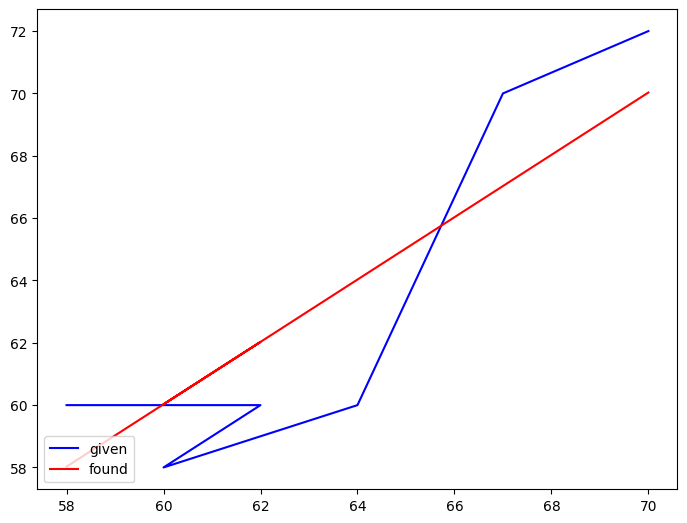

 1.0001964352034554 0.015637936289919968


In [3]:
# stochastic gradient descent; using mse as error function
# but since we are using stochastic gradient descent the no. of iterations is only 1
# that means that mse = (predict - given) ** 2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('height.csv')
x = df['mother_height'].to_numpy()
y = df['daughter_height'].to_numpy()

b0, b1 = 0, 0
a = 0.00001
y_len = len(y)

# 4 epochs
for i in range(24):
    for j in range(y_len):
        p = (b0 * x[j]) + b1
        b0 = b0 - (2 * (p - y[j]) * x[j] * a)
        b1 = b1 - (2 * (p - y[j]) * a)

predict = []
mse = 0
for i in range(y_len):
    p = (b0 * x[i]) + b1
    predict.append(p)
    mse += (p  - y[i]) ** 2
mse /= y_len
print(mse)
predict = np.array(predict)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.plot(x, y, label = 'given', color = 'blue')
plt.plot(x, predict, label = 'found', color = 'red')
plt.legend(loc = 'lower left')
plt.show()
print(f' {b0} {b1}')

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('height.csv')
x = df[['mother_height']].to_numpy()
y = df['daughter_height'].to_numpy()

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

model = SGDRegressor(max_iter = 24)
model.fit(xtrain, ytrain.ravel())

y_pred = model.predict(xtest)
print(mean_squared_error(ytest, y_pred))
print(model.coef_)
print(model.intercept_)

1.1223360571501837e+26
[-1.64778475e+11]
[-1.97999785e+09]


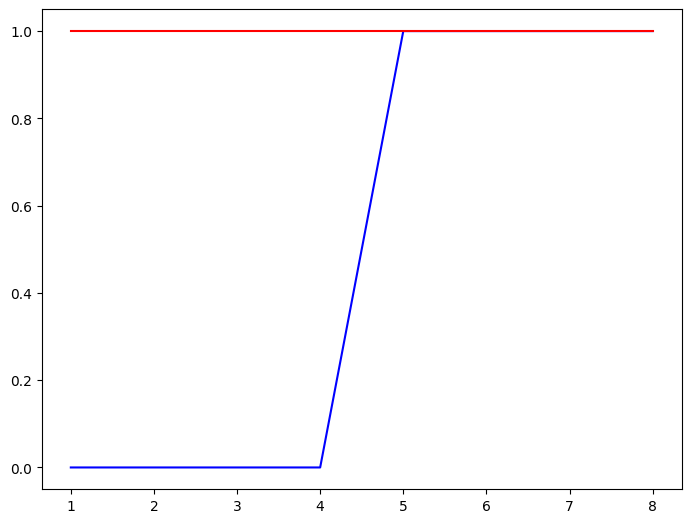

In [5]:
# taking error function as mse; since we are following stochastic method,
# no. of iterations is 1 for each mse calculation
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('study.csv')
x = df['hours'].to_numpy()
y = df['pass'].to_numpy()

b0, b1 = 0, 0
a = 0.01
y_len = len(y)

for i in range(3):
    for j in range(y_len):
        z = (b0 * x[j]) + b1
        p = 1 / (1 + np.exp(-1 * z))
        if p >= 0.5:
            p = 1
        else:
            p = 0
        # note mse is cost function, so differentiating it would give -2 as shown
        err = p * (1 - p) * (y[j] - p) * (-2)
        b0 = b0 - (b0 * err * a)
        b1 = b1 - (b1 * err * a * x[j])

predict = []
mse = 0
for i in range(y_len):
    z = (b0 * x[j]) + b1
    p = 1 / (1 + np.exp(-1 * z))
    if p >= 0.5:
        p = 1
    else:
        p = 0
    predict.append(p)
    mse += (p - y[i]) ** 2
mse /= y_len
predict = np.array(predict)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.plot(x, y, label = 'given', color = 'blue')
plt.plot(x, predict, label = 'found', color = 'red')
plt.show()

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('study.csv')
x = df[['hours']].to_numpy()
y = df['pass'].to_numpy()

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)
model = LogisticRegression()
model.fit(xtrain, ytrain.ravel())

ypred = model.predict(xtest)
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

[[2]]


/home/linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


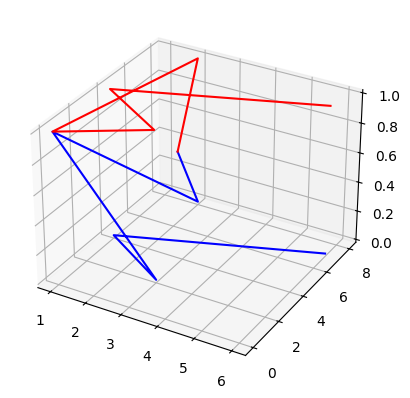

In [7]:
# using mse as error function; note no. of iterations considered once for
# error calculations is 1 due to stochastic gradient descent
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('data.csv')
x1 = df['x1'].to_numpy()
x2 = df['x2'].to_numpy()
y = df['y'].to_numpy()

b0, b1, b2 = 0, 0, 0
a = 0.1
y_len = len(y)

for i in range(y_len):
    y[i] = 1 if y[i] >= 0 else 0

for i in range(4):
    for j in range(y_len):
        z = b0 + (b1 * x1[j]) + (b2 * x2[j])
        p = 1 / (1 + np.exp(-1 * z))
        if p >= 0:
            p = 1
        else:
            p = 0
        err = p * (1 - p) * (y[i] - p) * (-2)
        b0 = b0 - (a * err)
        b1 = b1 - (a * err * x1[j])
        b2 = b2 - (a * err * x2[j])

predict = []
for i in range(y_len):
    z = b0 + (b1 * x1[j]) + (b2 * x2[j])
    p = 1 / (1 + np.exp(-1 * z))
    if p >= 0:
        p = 1
    else:
        p = 0
    predict.append(p)
    
predict = np.array(predict)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.plot(x1, x2, y, label= 'given', color= 'blue')
plt.plot(x1, x2, predict, label= 'found', color = 'red')
plt.show()

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('data.csv')
X = df[['x1', 'x2']]
y = df['y']

y_binary = (y > 0).astype(int)  # Convert Y to binary

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Print the model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Model Coefficients: [[ 0.51885356 -0.56803671]]
Model Intercept: [-1.10237188]


/home/linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
